## Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

Step 1: Importing and Merging Data

In [4]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
churn_data="C:\\Users\\HRIDYA RAMESH K\\Downloads\\churn_data.csv"

In [7]:
# Importing all datasets
churn_data = pd.read_csv("C:\\Users\\HRIDYA RAMESH K\\Downloads\\churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
customer_data = pd.read_csv("C:\\Users\\HRIDYA RAMESH K\\Downloads\\customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [9]:
internet_data = pd.read_csv("C:\\Users\\HRIDYA RAMESH K\\Downloads\\internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


Combining all data files into one consolidated dataframe

In [10]:
# Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [11]:
# Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

Step 2: Inspecting the Dataframe

In [12]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [13]:
telecom.shape

(7043, 21)

In [14]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

In [15]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [16]:
telecom.columns.values

array(['customerID', 'tenure', 'PhoneService', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies'], dtype=object)

In [17]:
telecom.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
dtype: object

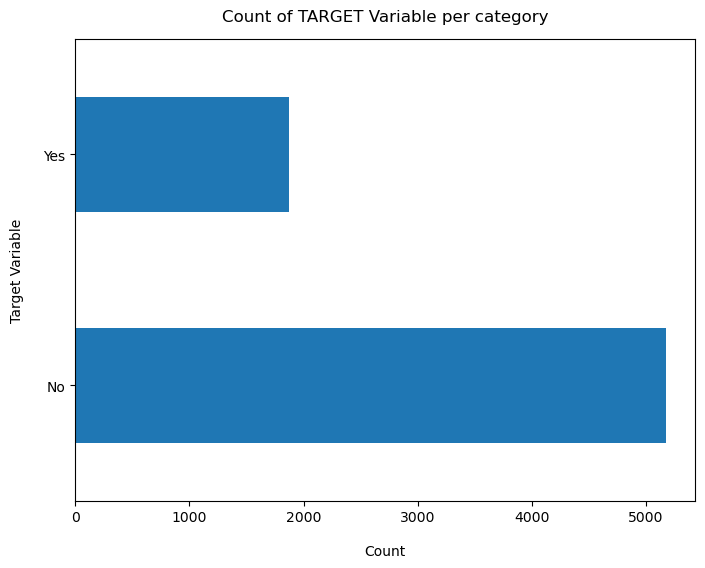

In [18]:
telecom['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [19]:
100*telecom['Churn'].value_counts()/len(telecom['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [20]:
telecom['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Data is highly imbalanced, ratio = 73:27
So we analyse the data with other features while taking the target values separately to get some insights.

In [21]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
telecom.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


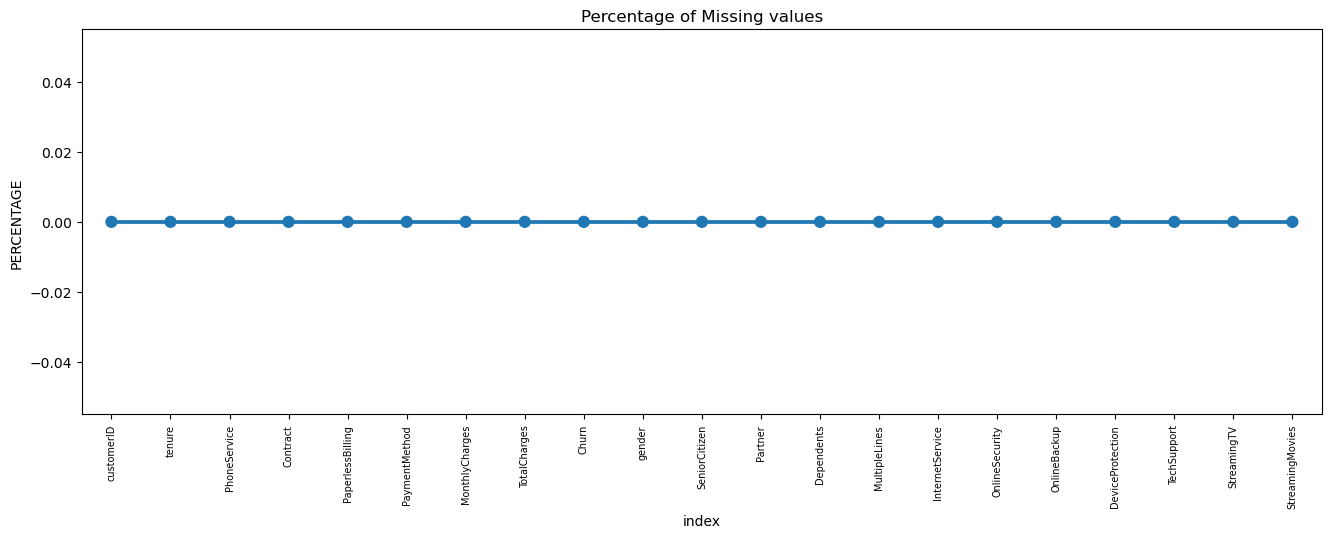

In [22]:
missing = pd.DataFrame((telecom.isnull().sum())*100/telecom.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

Data Cleaning

In [23]:
telco_data = telecom.copy()

In [24]:
#convert it to numerical data type
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
dtype: int64

In [25]:
telco_data.loc[telco_data ['TotalCharges'].isnull() == True]

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
488,4472-LVYGI,0,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,Female,...,Yes,Yes,No phone service,DSL,Yes,No,Yes,Yes,Yes,No
753,3115-CZMZD,0,Yes,Two year,No,Mailed check,20.25,NaN,No,Male,...,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
936,5709-LVOEQ,0,Yes,Two year,No,Mailed check,80.85,NaN,No,Female,...,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes
1082,4367-NUYAO,0,Yes,Two year,No,Mailed check,25.75,NaN,No,Male,...,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
1340,1371-DWPAZ,0,No,Two year,No,Credit card (automatic),56.05,NaN,No,Female,...,Yes,Yes,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No
3331,7644-OMVMY,0,Yes,Two year,No,Mailed check,19.85,NaN,No,Male,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
3826,3213-VVOLG,0,Yes,Two year,No,Mailed check,25.35,NaN,No,Male,...,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
4380,2520-SGTTA,0,Yes,Two year,No,Mailed check,20.00,NaN,No,Female,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
5218,2923-ARZLG,0,Yes,One year,Yes,Mailed check,19.70,NaN,No,Male,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
6670,4075-WKNIU,0,Yes,Two year,No,Mailed check,73.35,NaN,No,Female,...,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No


 Missing Value Treatement
Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [26]:
#Removing missing values 
telco_data.dropna(how = 'any', inplace = True)

#telco_data.fillna(0)

 Divide customers into bins based on tenure 

In [27]:
# Get the max tenure
print(telco_data['tenure'].max())

72


In [28]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [29]:
telco_data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [30]:
#drop column customerID and tenure
telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data.head()

,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure_group
0,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,1 - 12
1,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,25 - 36
2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,1 - 12
3,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,37 - 48
4,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,1 - 12


# Data Exploration
# Univariate Analysis

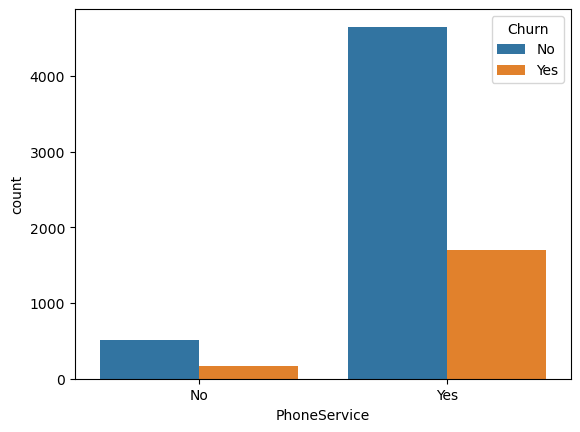

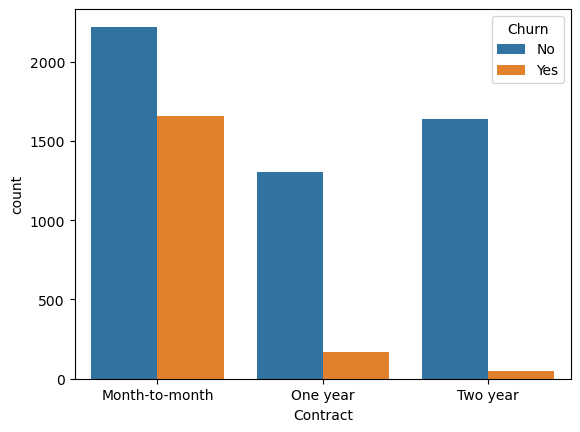

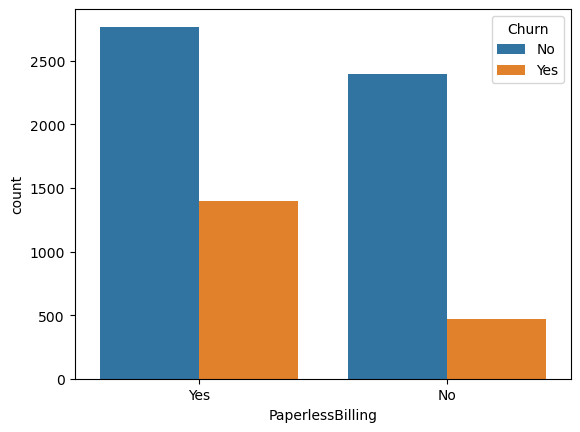

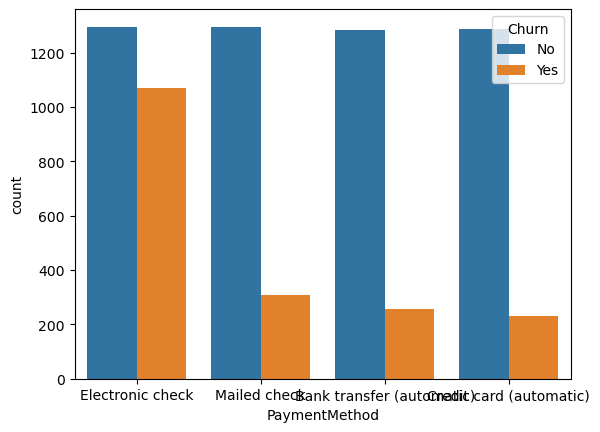

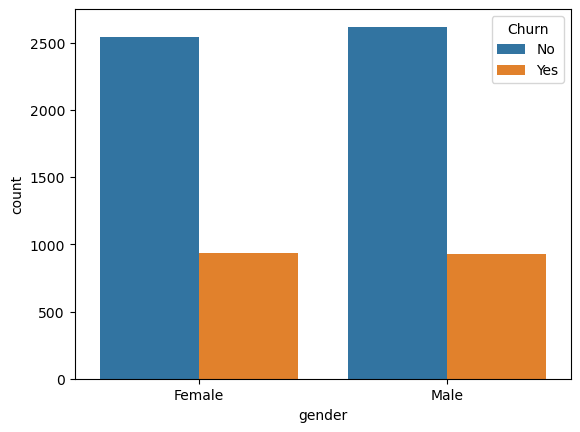

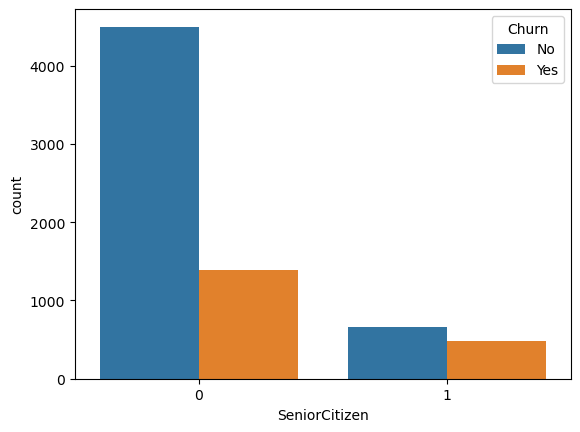

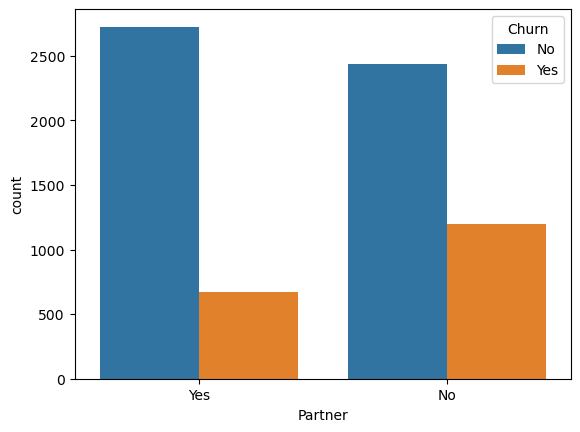

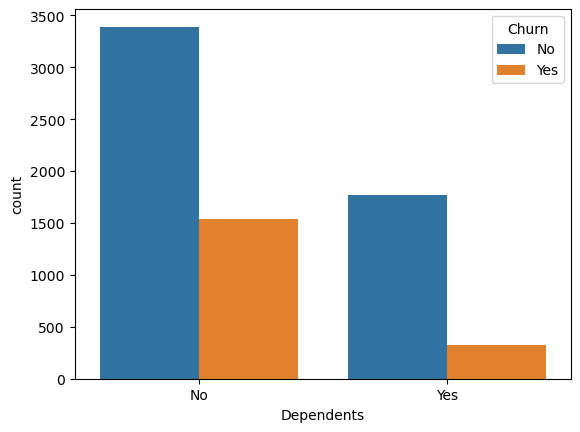

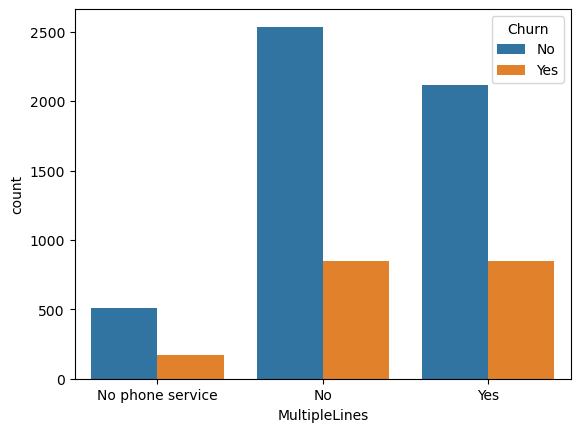

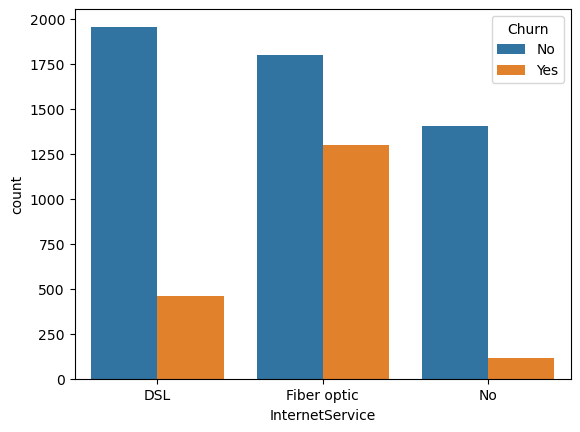

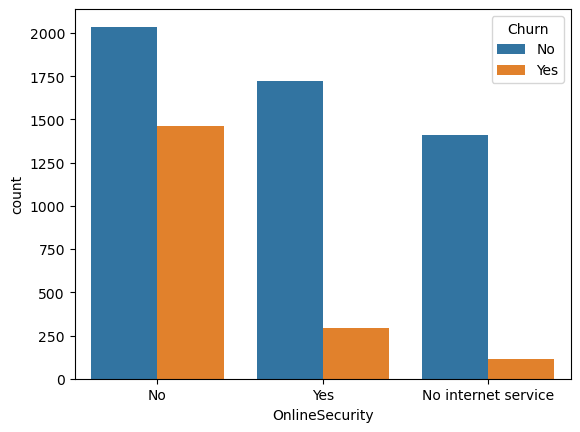

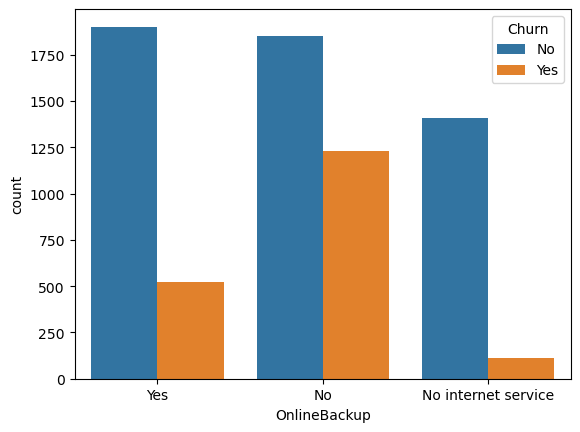

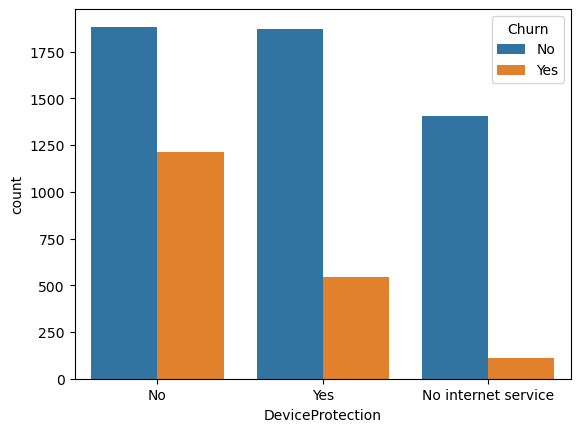

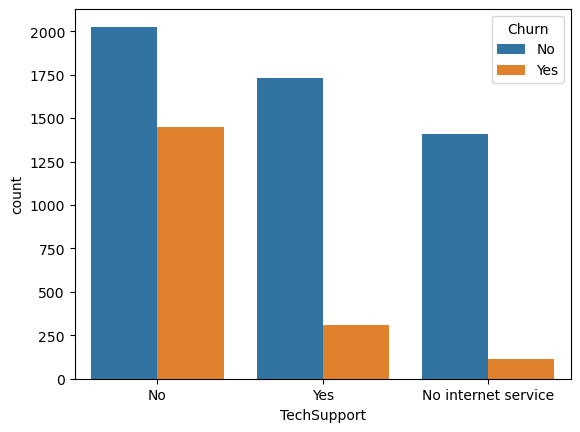

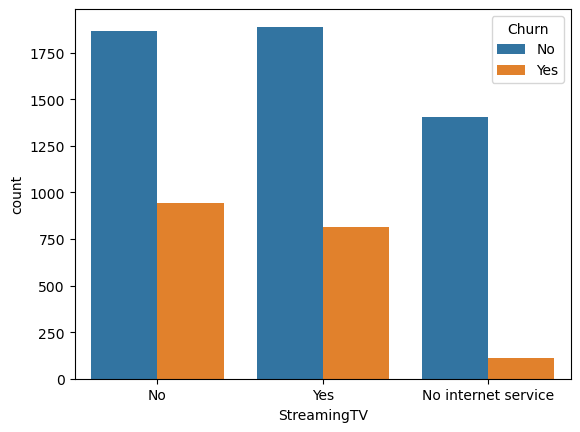

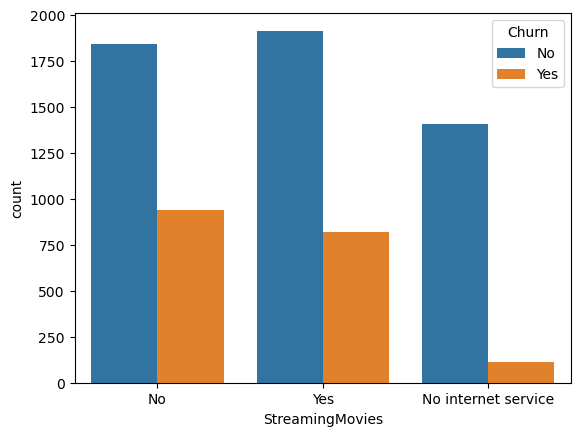

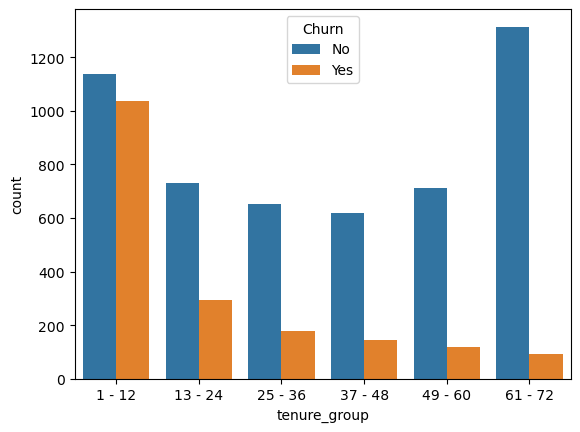

In [31]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [32]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [33]:
telco_data.head()

,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure_group
0,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,1 - 12
1,Yes,One year,No,Mailed check,56.95,1889.50,0,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,25 - 36
2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,1 - 12
3,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,37 - 48
4,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,1 - 12


In [34]:
#Convert all the categorical variables into dummy variables

telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,29.85,29.85,0,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,56.95,1889.50,0,0,0,1,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0
2,53.85,108.15,1,0,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,42.30,1840.75,0,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
4,70.70,151.65,1,0,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0


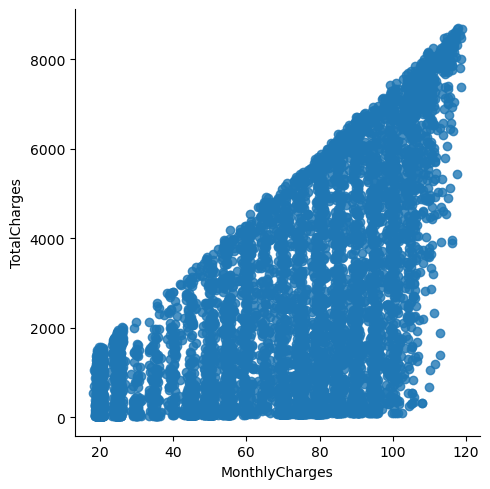

In [35]:
#Relationship between Monthly Charges and Total Charges

sns.lmplot(data=telco_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Total Charges increase as Monthly Charges increase - as expected.

 Churn by Monthly Charges and Total Charges

Text(0.5, 1.0, 'Monthly charges by churn')

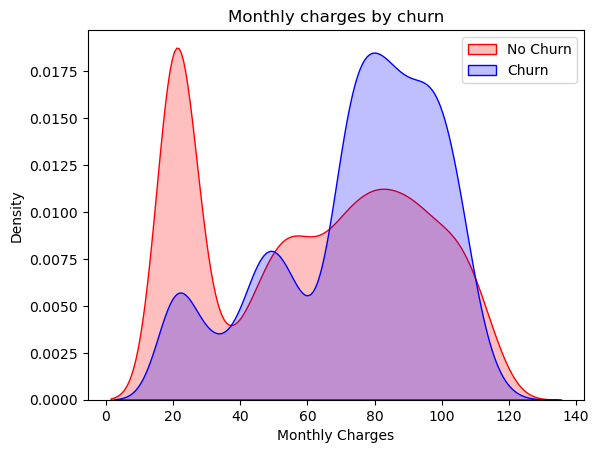

In [36]:
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Insight: Churn is high when Monthly Charges ar high

Text(0.5, 1.0, 'Total charges by churn')

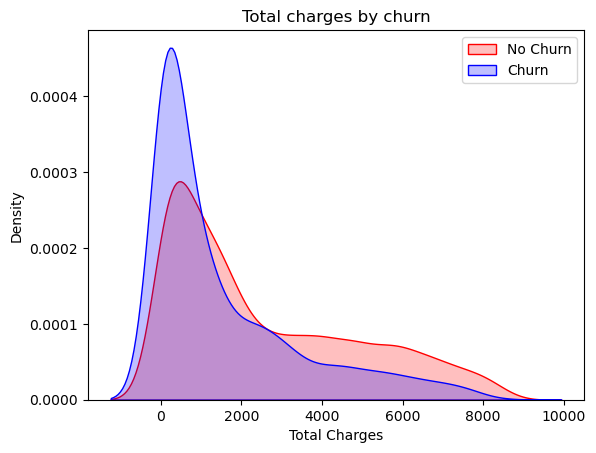

In [37]:
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

Surprising insight as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

<AxesSubplot:>

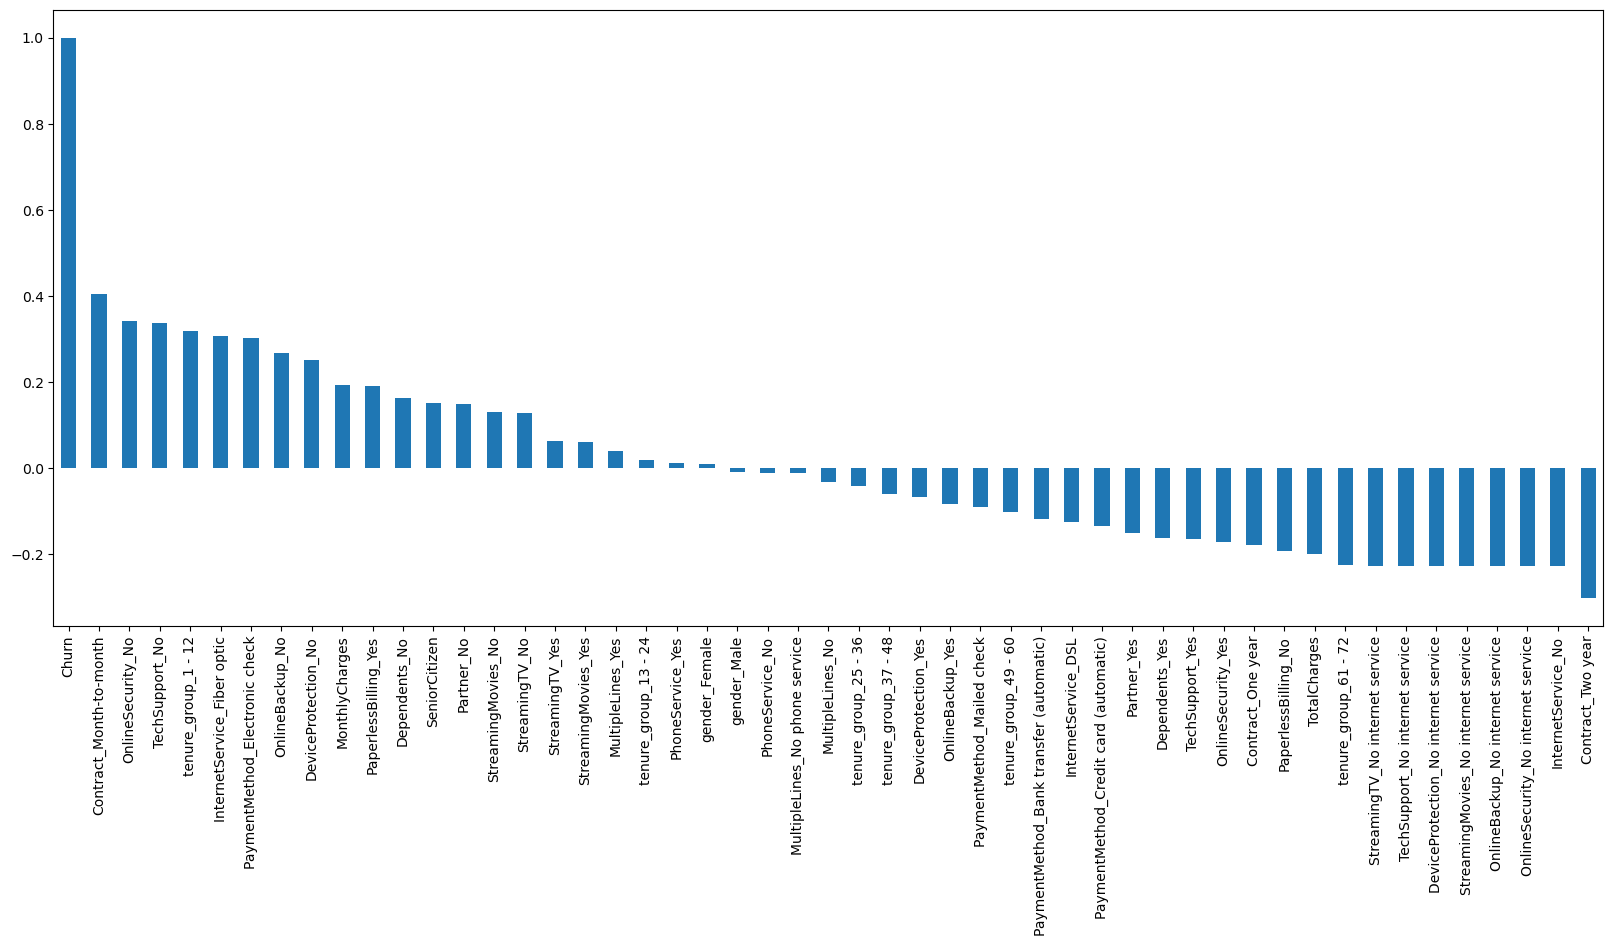

In [38]:
#Build a corelation of all predictors with 'Churn'

plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Derived Insight:

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

This is also evident from the Heatmap below

<AxesSubplot:>

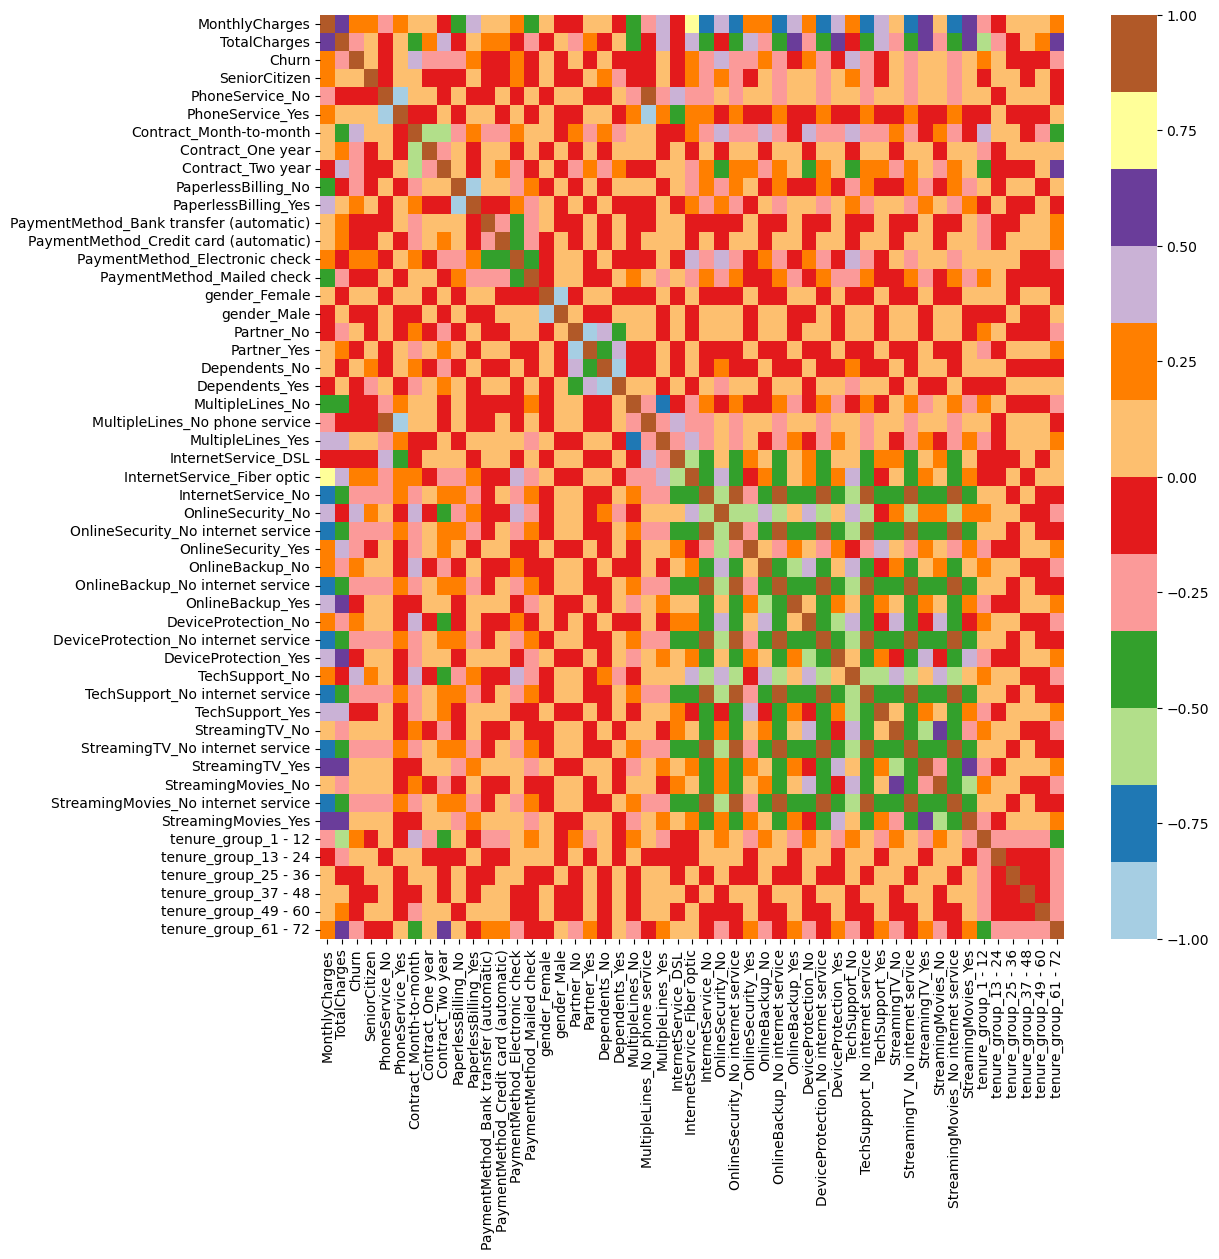

In [39]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")

# Bivariate Analysis

In [40]:
new_df1_target0=telco_data.loc[telco_data["Churn"]==0]
new_df1_target1=telco_data.loc[telco_data["Churn"]==1]
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

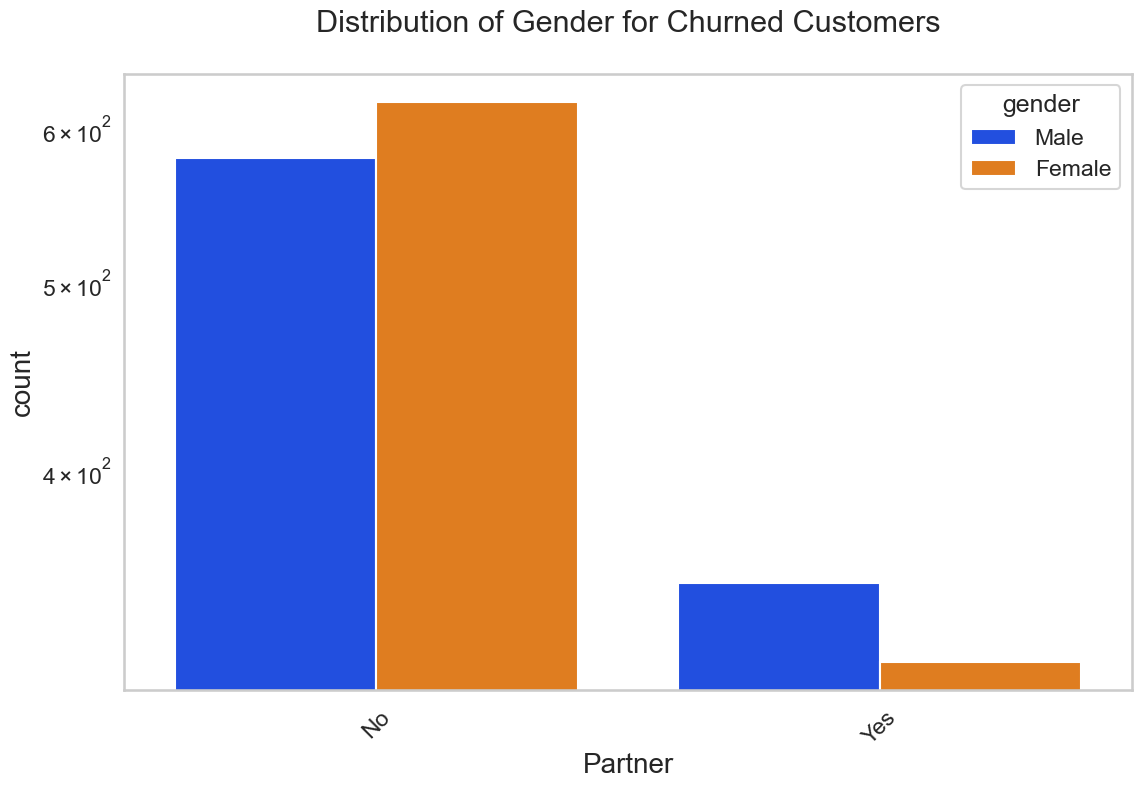

In [41]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

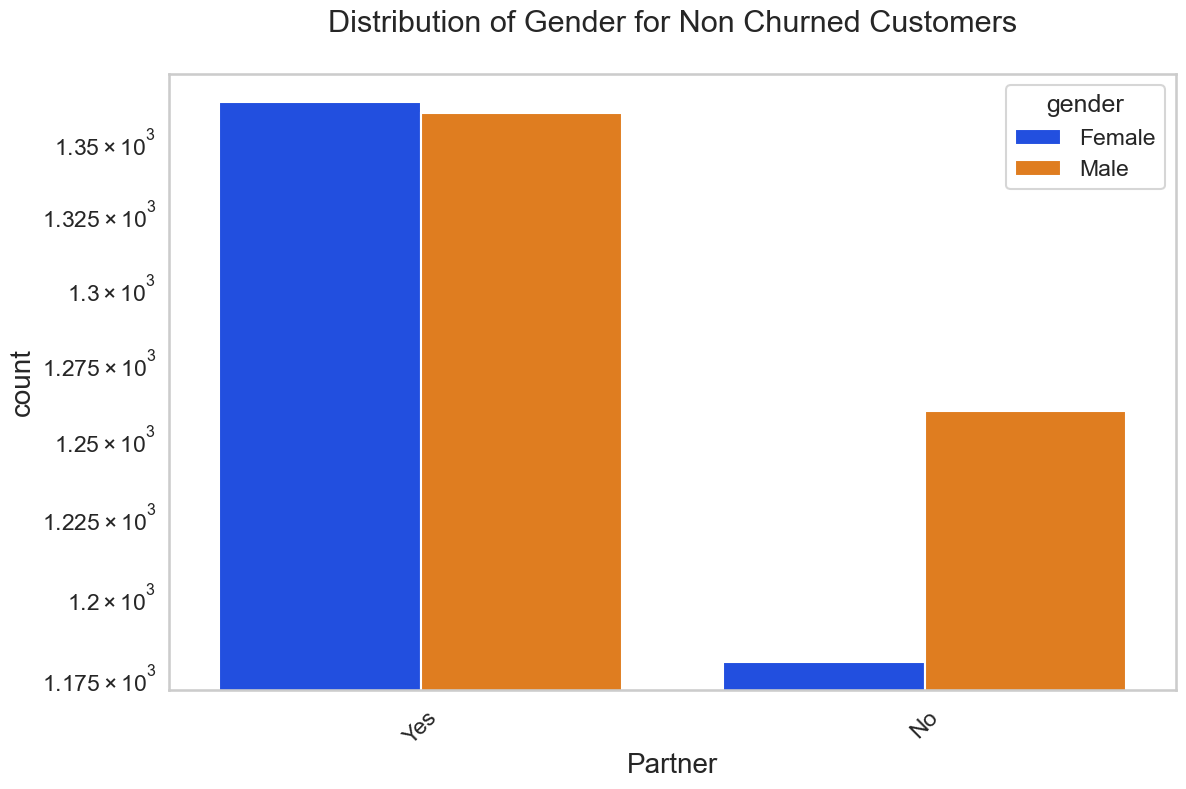

In [42]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

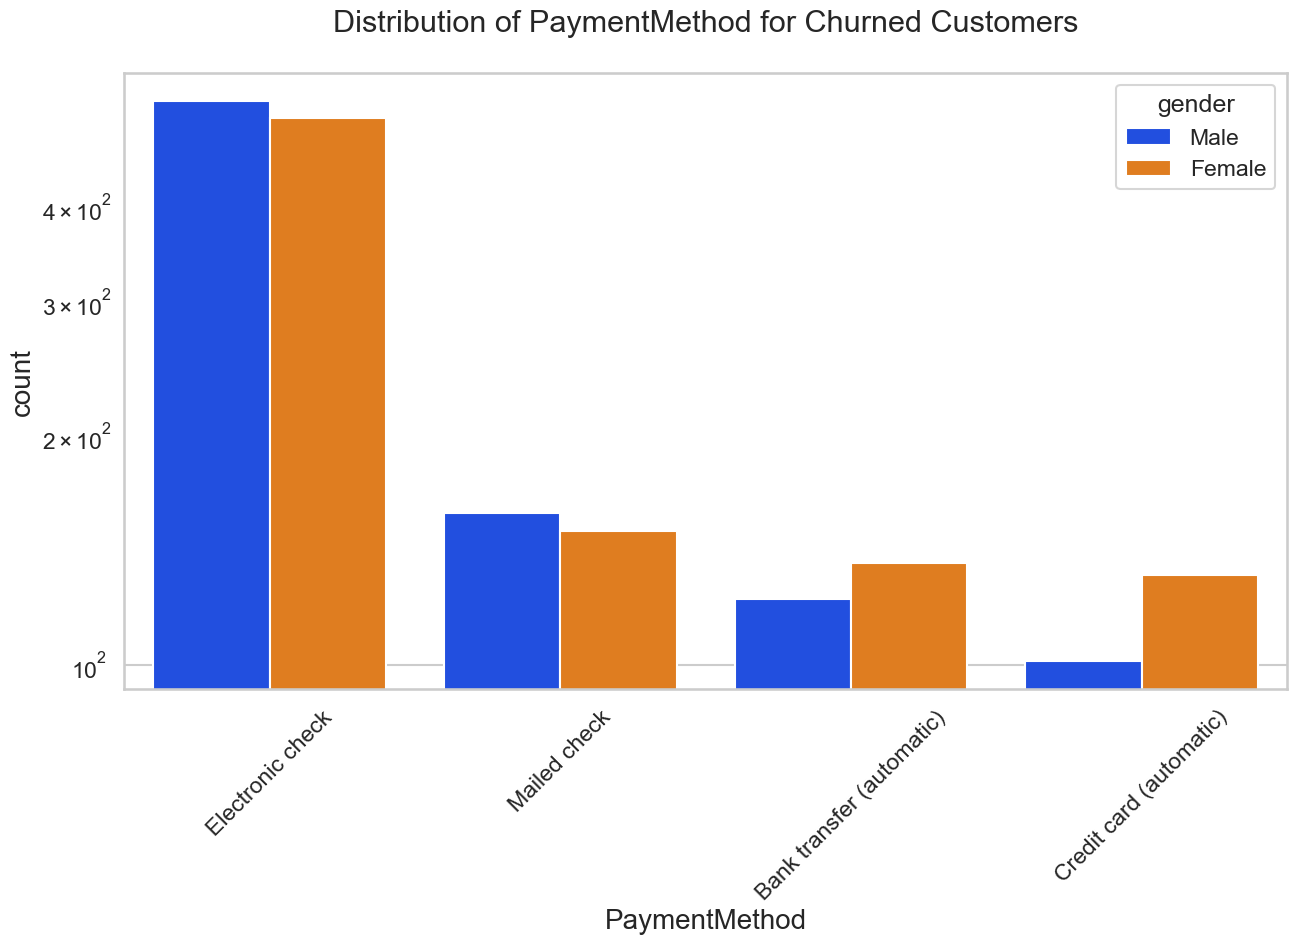

In [43]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

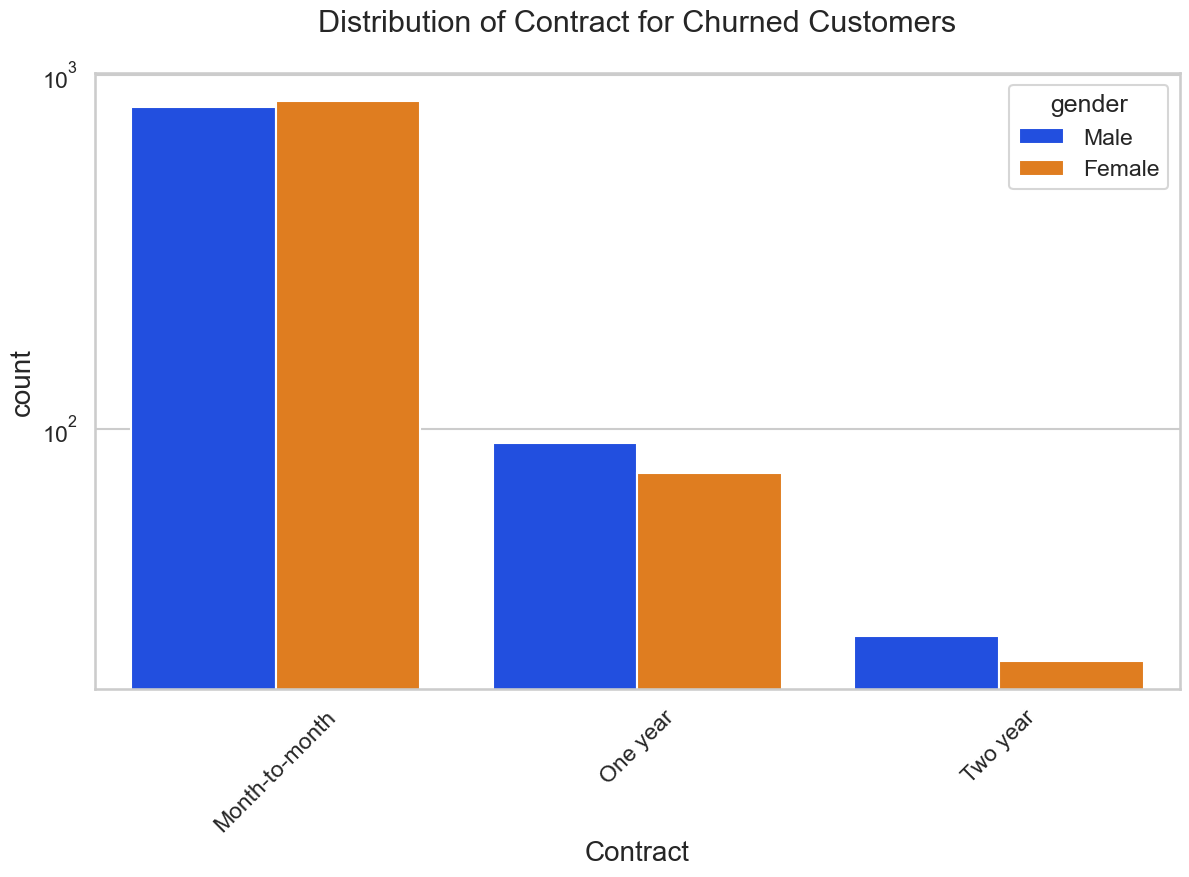

In [44]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

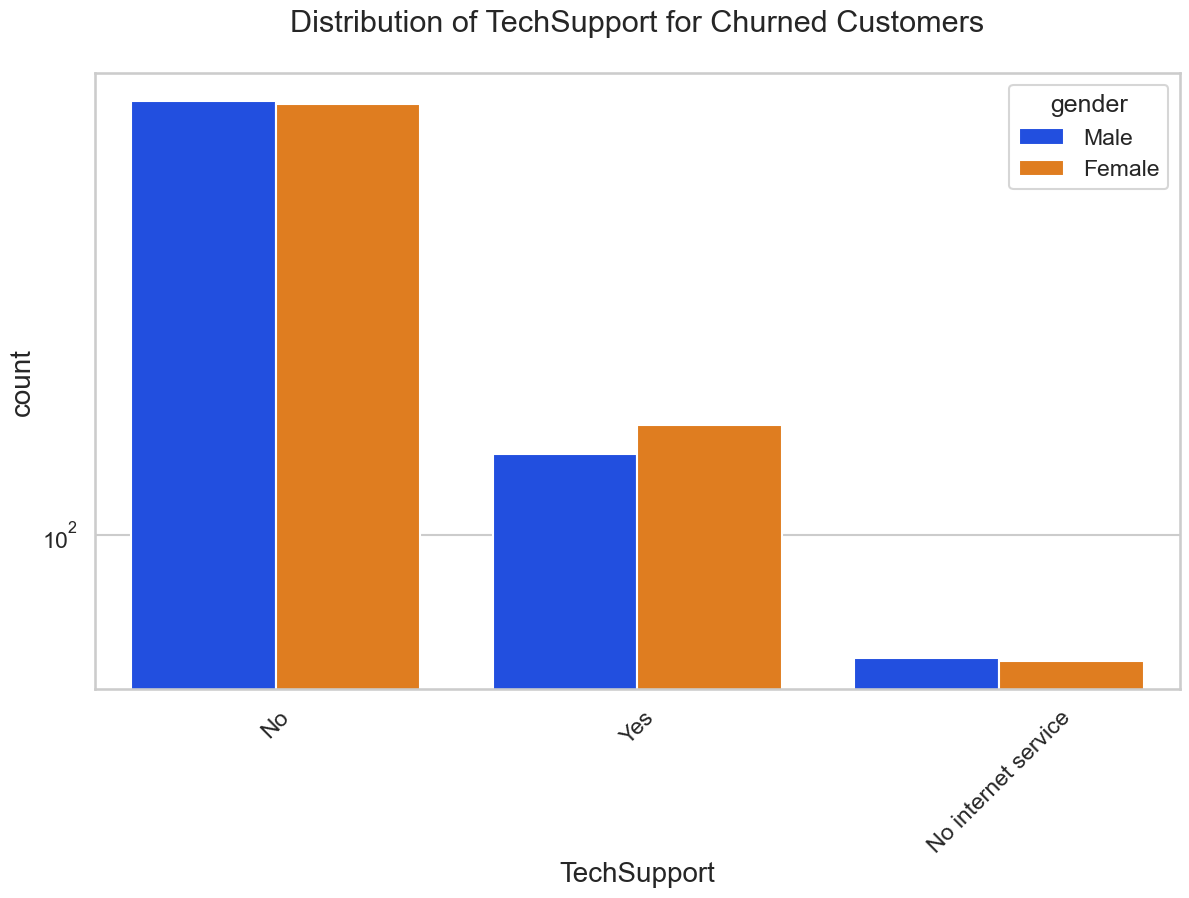

In [45]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

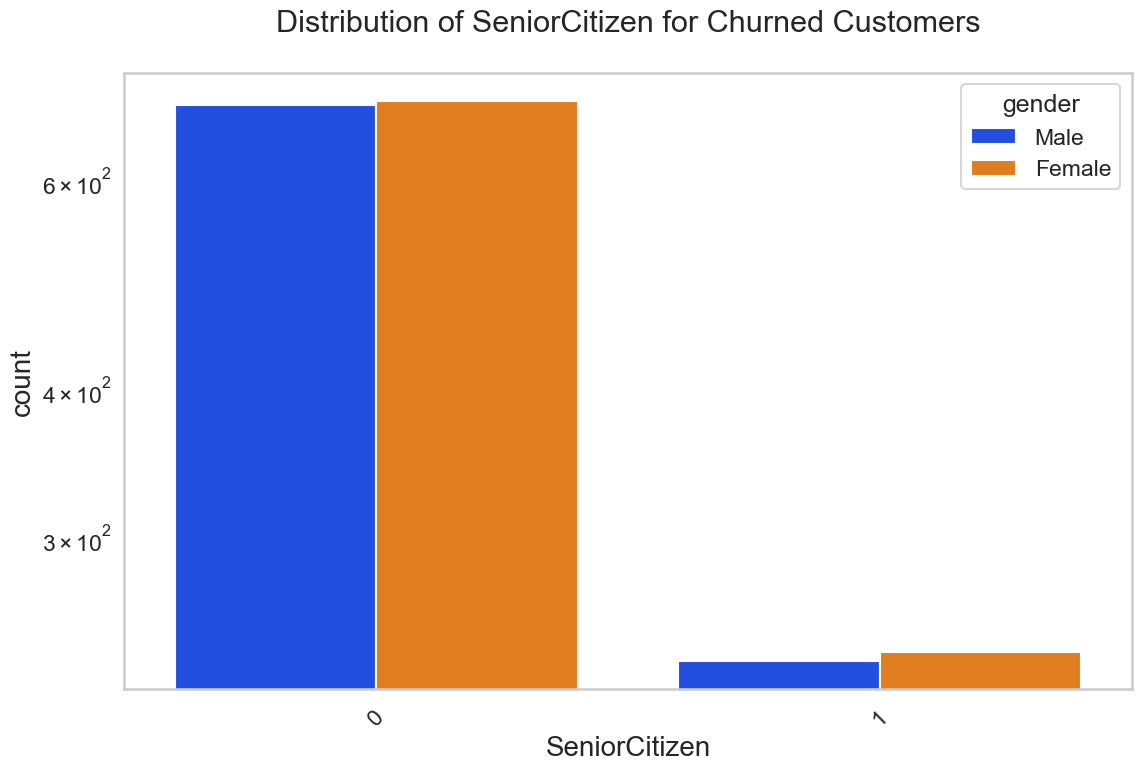

In [46]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

CONCLUSION

Electronic check medium are the highest churners
Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
No Online security, No Tech Support category are high churners
Non senior Citizens are high churners
Note: There could be many more such insights, so take this as an assignment and try to get more insights :)

In [47]:
telco_data_dummies.to_csv('tel_churn.csv')

In [48]:
pip install imblearn


Note: you may need to restart the kernel to use updated packages.


# Model building

In [5]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [6]:
#Reading csv
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
1,1,56.95,1889.50,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2,2,53.85,108.15,1,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,3,42.30,1840.75,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,4,70.70,151.65,1,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0


In [7]:
df=df.drop('Unnamed: 0',axis=1)
x=df.drop('Churn',axis=1)
x

,MonthlyCharges,TotalCharges,SeniorCitizen,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,29.85,29.85,0,1,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
1,56.95,1889.50,0,0,1,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2,53.85,108.15,0,0,1,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
3,42.30,1840.75,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,70.70,151.65,0,0,1,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,84.80,1990.50,0,0,1,0,1,0,0,1,...,1,0,0,1,0,1,0,0,0,0
7028,103.20,7362.90,0,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
7029,29.60,346.45,0,1,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
7030,74.40,306.60,1,0,1,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


In [8]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [9]:
#Train Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Decision Tree Classifier

In [10]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [11]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [12]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [13]:
model_dt.score(x_test,y_test)

0.7803837953091685

In [14]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1028
           1       0.61      0.50      0.55       379

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.
Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.


In [15]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [16]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [17]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [18]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9334470989761092
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       548
           1       0.94      0.94      0.94       624

    accuracy                           0.93      1172
   macro avg       0.93      0.93      0.93      1172
weighted avg       0.93      0.93      0.93      1172



In [19]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[509  39]
 [ 39 585]]


In [54]:
knn_accuracy=(509+585)/(509+585+39+39)
knn_accuracy

0.9334470989761092

Now we can see quite better results, i.e. Accuracy: 93 %, and a very good recall, precision & f1 score for minority class.

# KNN Classifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn=KNeighborsClassifier()

In [23]:
knn.fit(xr_train,yr_train)

KNeighborsClassifier()

In [24]:
y_predknn=knn.predict(xr_test)
print(classification_report(y_predknn,yr_test))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       518
           1       0.98      0.93      0.96       654

    accuracy                           0.95      1172
   macro avg       0.95      0.95      0.95      1172
weighted avg       0.95      0.95      0.95      1172



C:\Users\HRIDYA RAMESH K\Downloads\jupitor\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [25]:
print(confusion_matrix(y_predknn,yr_test))

[[505  13]
 [ 43 611]]


In [53]:
knn_accuracy=(505+611)/(505+611+13+43)
knn_accuracy

0.9522184300341296

# SVM Classifier

In [27]:
from sklearn.svm import SVC

In [28]:
model_svm=SVC(kernel='linear')

In [35]:
model_svm.fit(xr_train,yr_train)

SVC(kernel='linear')

In [36]:
y_pred_svm=model_svm.predict(xr_test)

In [37]:
print(classification_report(y_pred_svm,yr_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       552
           1       0.94      0.94      0.94       620

    accuracy                           0.94      1172
   macro avg       0.94      0.93      0.93      1172
weighted avg       0.94      0.94      0.94      1172



In [38]:
print(confusion_matrix(y_pred_svm,yr_test))

[[512  40]
 [ 36 584]]


In [52]:
accuracy_svm=(512+584)/(512+584+40+36)
accuracy_svm

0.9351535836177475

# Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
model_rf=RandomForestClassifier(n_estimators=100,criterion='gini',random_state=200,max_depth=6,min_samples_leaf=8)

In [42]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=200)

In [43]:
y_pred_rf=model_rf.predict(x_test)

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1028
           1       0.61      0.50      0.55       379

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [45]:
model_smote_rf=RandomForestClassifier(n_estimators=200,criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)

In [46]:
model_smote_rf.fit(xr_train,yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, n_estimators=200,
                       random_state=100)

In [47]:
y_pred_smote_rf=model_smote_rf.predict(xr_test)

In [48]:
print(classification_report(y_pred_smote_rf,yr_test))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       518
           1       0.95      0.91      0.93       654

    accuracy                           0.92      1172
   macro avg       0.92      0.93      0.92      1172
weighted avg       0.93      0.92      0.93      1172



In [49]:
print(confusion_matrix(y_pred_smote_rf,yr_test))

[[489  29]
 [ 59 595]]


In [51]:
accuracy_rf=(489+595)/(489+595+29+59)
accuracy_rf

0.9249146757679181